# Generic sklearn model - MIA (RandomForest)

Download data from https://physionet.org/content/mimic2-iaccd/1.0/ (https://physionet.org/content/mimic2-iaccd/1.0/full_cohort_data.csv to download the full_cohort data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix#, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
#from sklearn.datasets import fetch_20newsgroups
#from sklearn.feature_extraction.text import TfidfVectorizer

from metricPlots import *
from MIA import *

%matplotlib inline

# Load data

In [2]:
path = "../../../../data/mimic2-iaccd/1.0/"
data_path = os.path.join(path, 'full_cohort_data.csv')

In [3]:
X = pd.read_csv(data_path)

# Exploring and processing data

In [4]:
X.head()

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_unit,...,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
0,1,7.63,13,72.36841,1.0,75.0,29.912791,15.0,9.0,SICU,...,354.0,138.0,4.6,15.0,109.0,41.0,1.6,196.0,39.0,2230.875000
1,0,1.14,1,64.92076,0.0,55.0,20.121312,NaN,5.0,MICU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.000000
2,0,2.86,5,36.50000,0.0,70.0,27.118272,16.0,5.0,MICU,...,295.0,144.0,3.9,17.0,101.0,16.0,0.8,298.0,30.0,2086.800293
3,1,0.58,3,44.49191,0.0,NaN,NaN,21.0,7.0,SICU,...,262.0,139.0,4.2,31.0,100.0,16.0,0.5,146.0,23.0,NaN
4,1,1.75,5,23.74217,1.0,95.2,28.464563,18.0,7.0,SICU,...,22.0,146.0,3.4,19.0,110.0,10.0,1.0,134.0,30.0,2358.244141


## Data specific processing

For data from https://physionet.org/content/mimic2-iaccd/1.0/

In [5]:
#remove columns non-numerical and repetitive or uninformative data for the analysis
col = ['service_unit', 'day_icu_intime', 'hosp_exp_flg','icu_exp_flg', 'day_28_flg'] 
#service_num is the numerical version of service_unit
#day_icu_intime_num is the numerical version of day_icu_intime
# the other columns are to do with death and are somewhat repetitive with censor_flg
X = X.drop(col,axis = 1)
#drop columns with only 1 value
X.drop('sepsis_flg', axis=1, inplace=True)

Generic cleaning up (all data sets)

In [6]:
#drop NA by row
X.dropna(axis=0, inplace=True)
X.shape

(1064, 40)


# Define variable of interest

In [7]:
#Change it for each dataset
var = 'censor_flg'#'aline_flg'#

Obtain labels and remove them from the data

In [8]:
y = X[var]
# Drop the column that contains the labels
X.drop([var], axis=1, inplace=True)

In [9]:
y = np.array(y)
X = np.array(X)
X.shape

(1064, 39)

# Define and train the target Models


Split into 3 groups:
  - target_train, to train the target models
  - shadow_train, to train the Salem shadow model 1
  - test, to test all models

In [10]:
X_target_train, X_test_tmp, y_target_train, y_test_tmp = train_test_split(X, y, shuffle=True, test_size=0.5, random_state=58954)
X_shadow_train, X_test, y_shadow_train, y_test = train_test_split(X_target_train, y_target_train, shuffle=True, test_size=0.5, random_state=58954)

In [11]:
classifiers = {
        'RandomForest':RandomForestClassifier(bootstrap=False), 
        'DecisionTree':DecisionTreeClassifier(),
        'GaussianProcess':GaussianProcessClassifier(),
        'MLP':MLPClassifier(),
        'KN':KNeighborsClassifier(),
        'SVM':SVC(kernel='rbf', probability=True)
}

In [12]:
trained_models = {}
for name,model in classifiers.items():
    trained_models[name] = model.fit(X_target_train, y_target_train) 

Model RandomForest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00       182

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266

Confusion matrix, without normalization


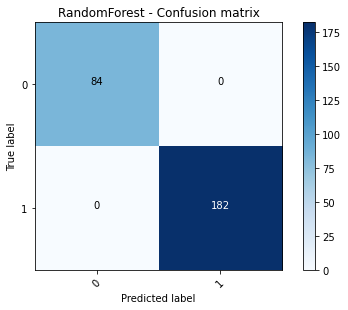

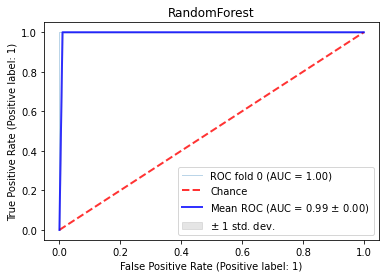

Model DecisionTree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00       182

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266

Confusion matrix, without normalization


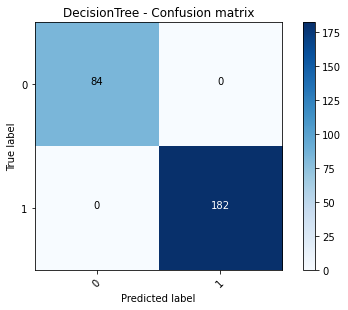

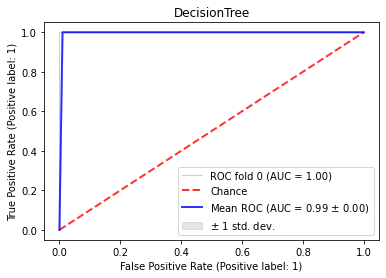

Model GaussianProcess
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00       182

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266

Confusion matrix, without normalization


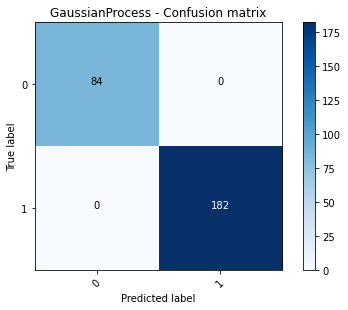

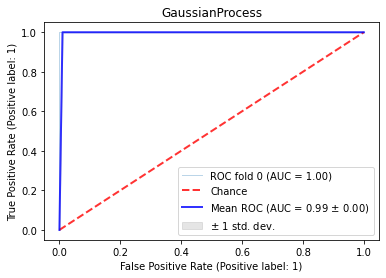

Model MLP
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00       182

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266

Confusion matrix, without normalization


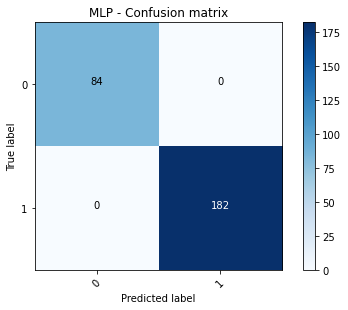

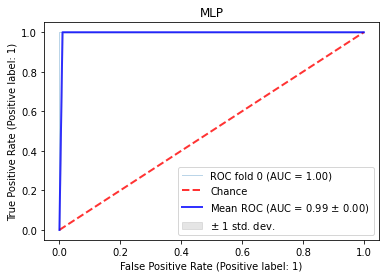

Model KN
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        84
           1       0.95      0.99      0.97       182

    accuracy                           0.96       266
   macro avg       0.96      0.94      0.95       266
weighted avg       0.96      0.96      0.96       266

Confusion matrix, without normalization


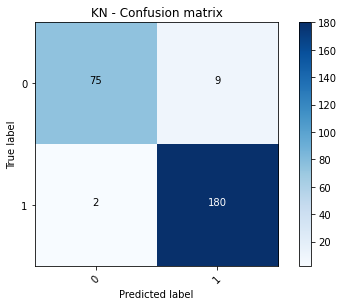

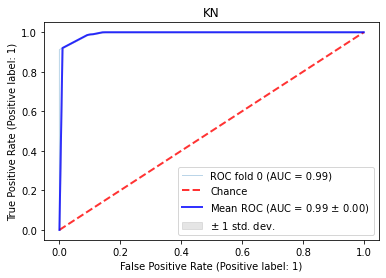

Model SVM
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        84
           1       0.95      1.00      0.97       182

    accuracy                           0.96       266
   macro avg       0.97      0.94      0.95       266
weighted avg       0.96      0.96      0.96       266

Confusion matrix, without normalization


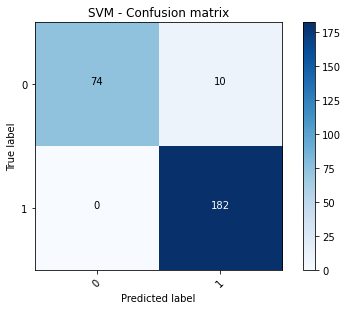

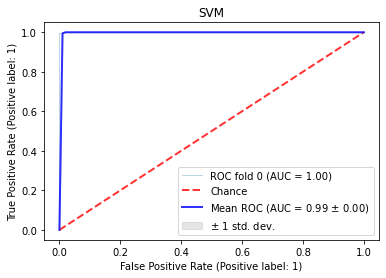

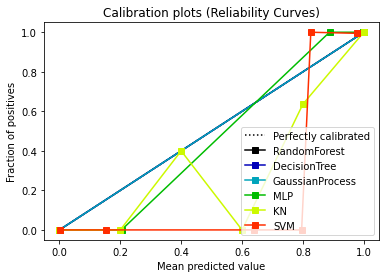

In [13]:
m_names = []
m_proba = []
for name, model in trained_models.items():
    print('Model', name)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    plot_confusion_matrix(name, confusion_matrix(y_test, y_pred), 2)
    plotROC_classifier(model, X_test, y_test, name)
    m_names.append(name)
    m_proba.append(model.predict_proba(X_test))
plot_calibration_curve(y_test, m_names, m_proba)

# Memebership inference attack

## Worst case scenario

This attack makes the assumption that the attacker has access to the actual training and test data. It is not a realistic attack model _but_ demonstrates whether or not the model is _intrinsically_ problematic.

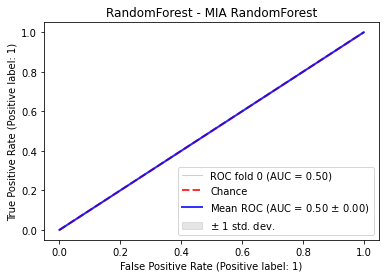

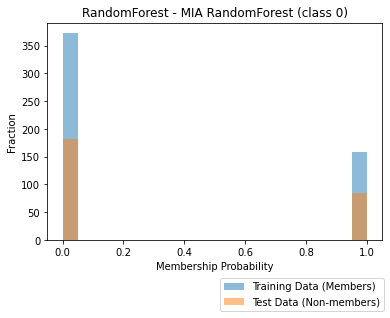

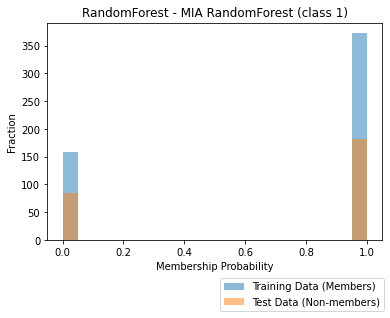

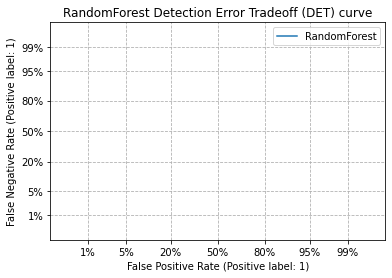

Attacker advantage 0.0


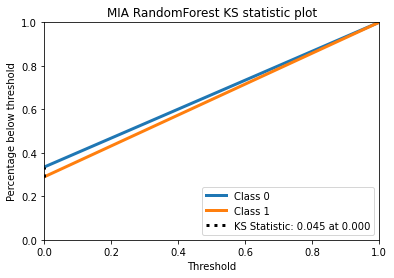

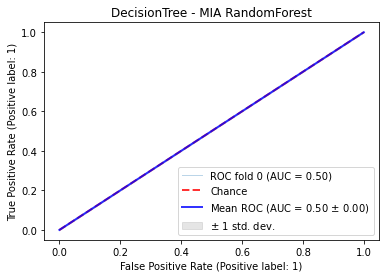

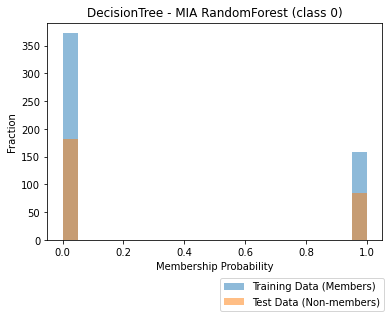

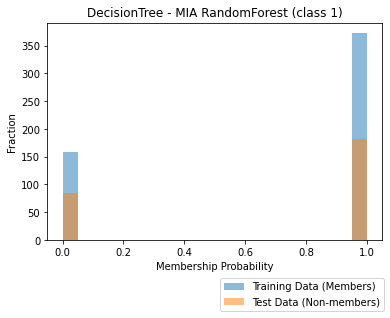

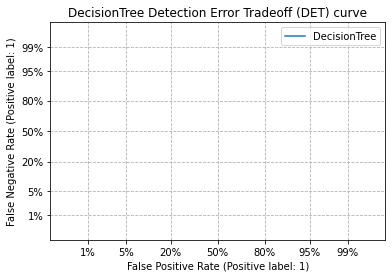

Attacker advantage 0.0


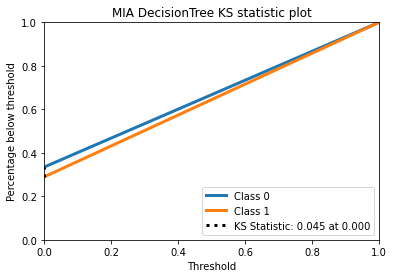

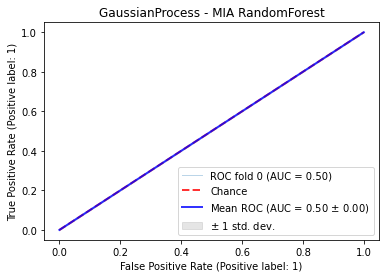

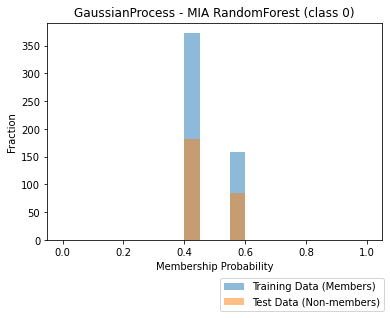

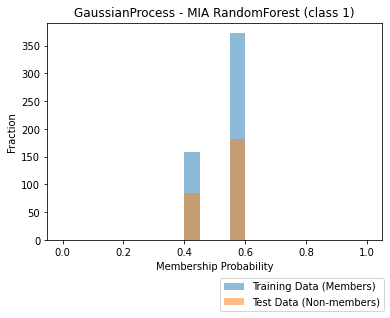

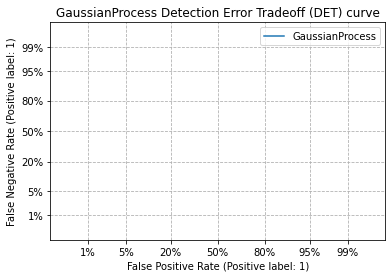

Attacker advantage 0.0


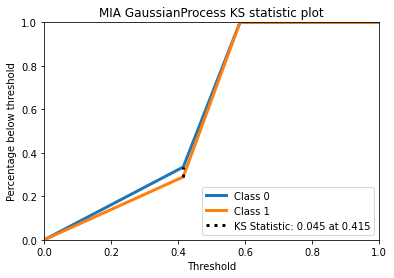

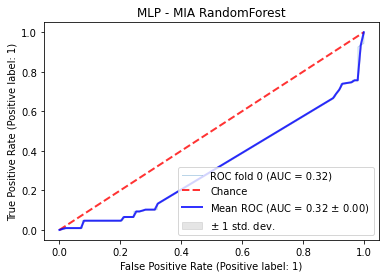

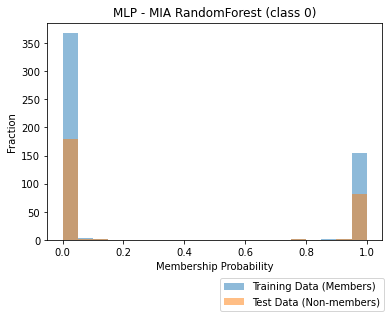

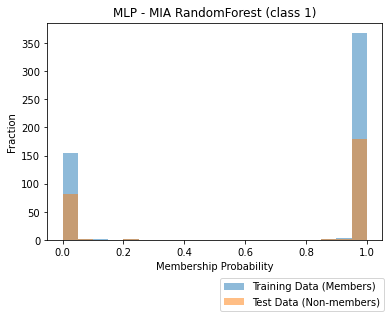

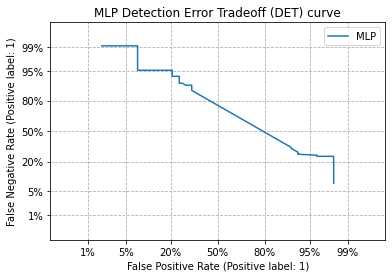

Attacker advantage 0.2054311408922589


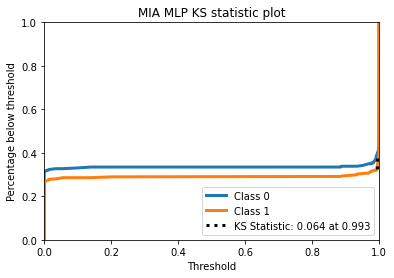

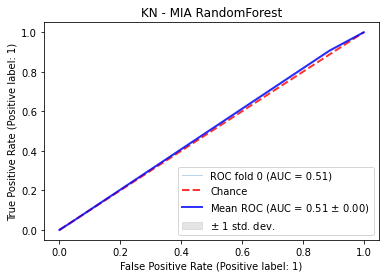

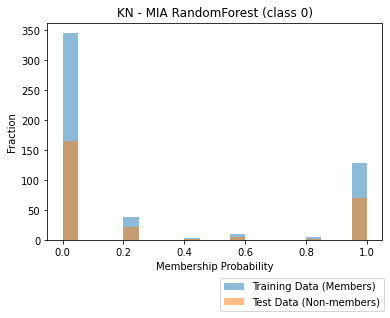

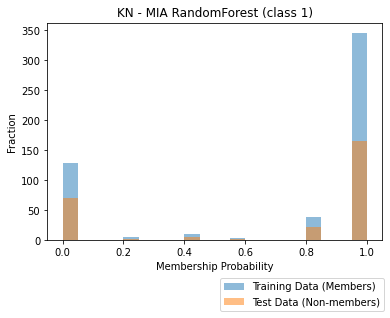

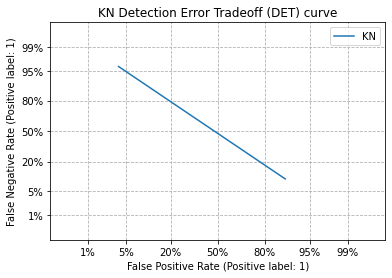

Attacker advantage 0.0


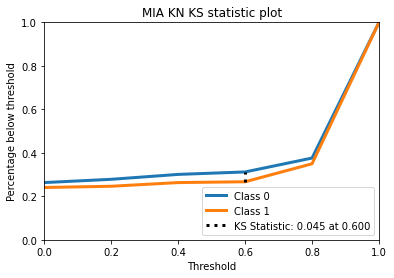

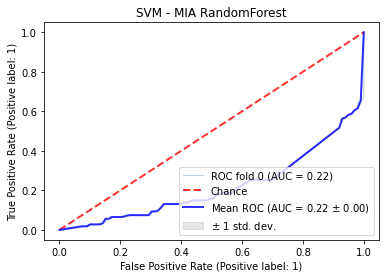

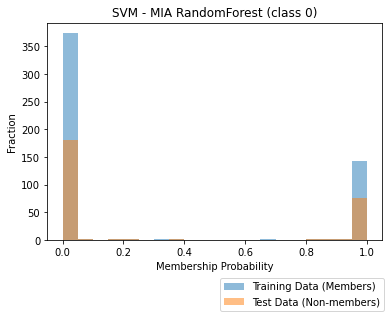

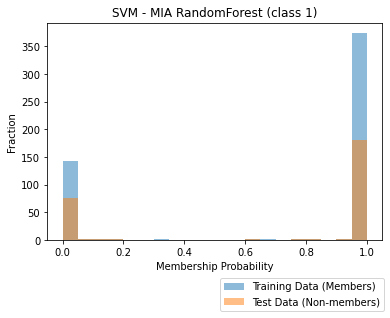

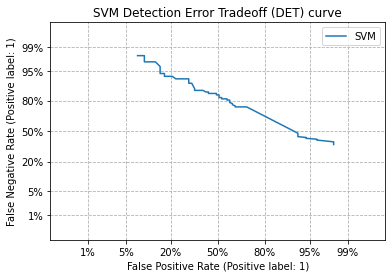

Attacker advantage 0.3456180567801094


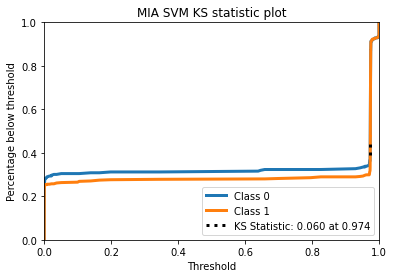

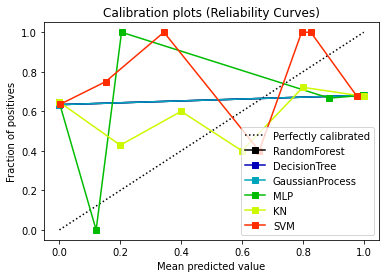

In [14]:
shadow_names = []
shadow_proba = []
for name, model in trained_models.items():
    mia_name = 'RandomForest'
    proba, y_labels = run_membership_inference_attack(name, model, X_target_train, X_test, RandomForestClassifier(), 'RandomForest')
    shadow_names.append(name)
    shadow_proba.append(np.concatenate(proba))
plot_calibration_curve(y_labels, shadow_names, shadow_proba)

# Salem adversary attacks

## Salem adversary 1

This attack assumes attacker has a dataset of the same distribution as the target's model tarining data.

The shadow model mimic the target's model behaviour.

Target model RandomForest


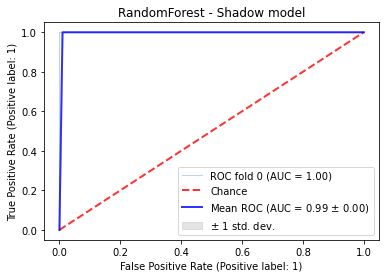

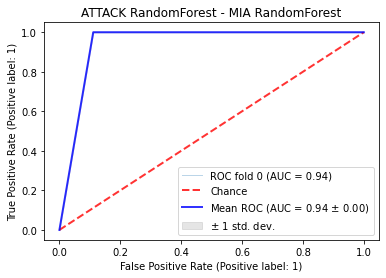

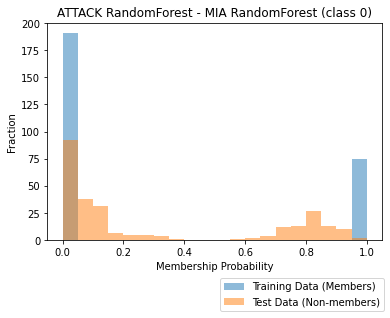

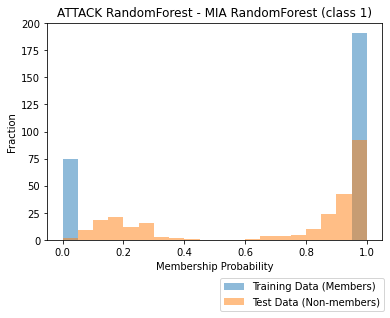

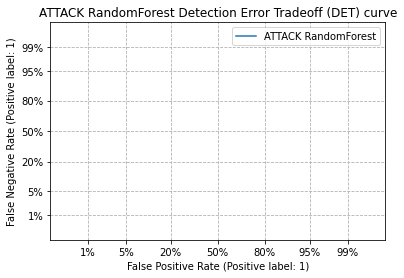

Attacker advantage 0.8888888888888888


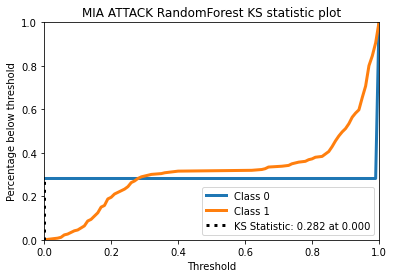

Target model DecisionTree


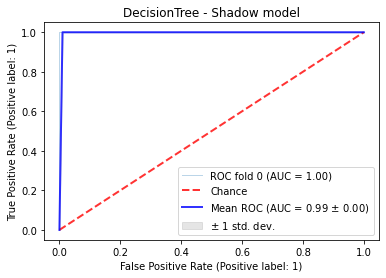

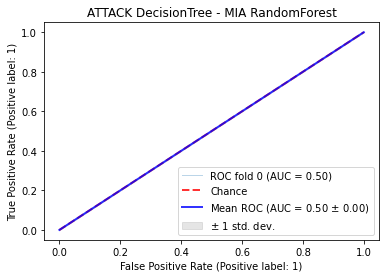

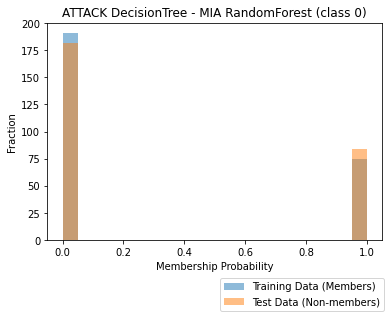

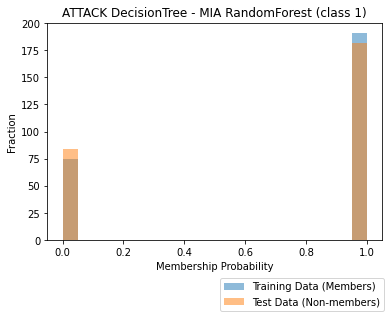

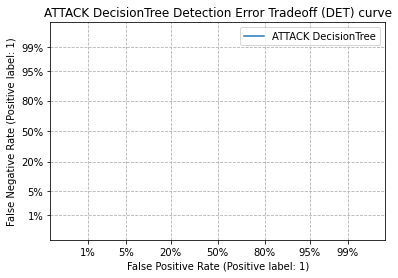

Attacker advantage 0.0


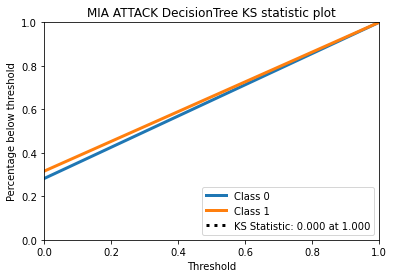

Target model GaussianProcess


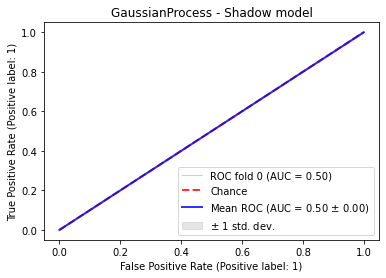

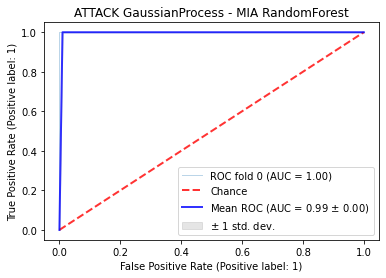

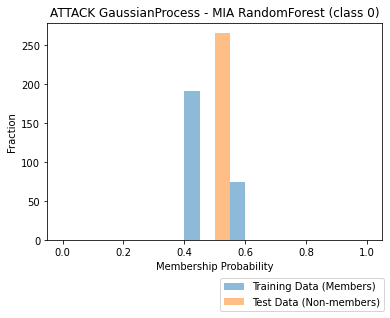

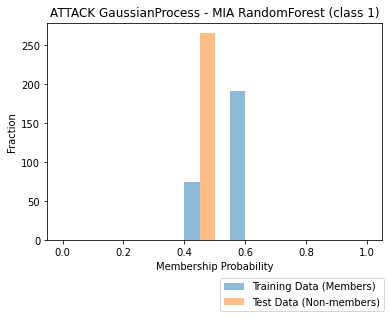

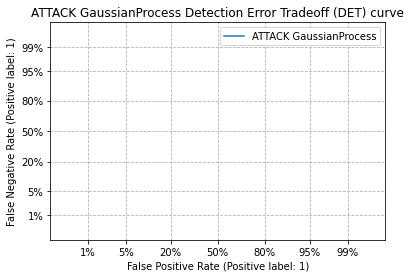

Attacker advantage 1.0


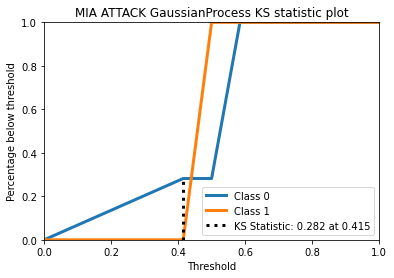

Target model MLP


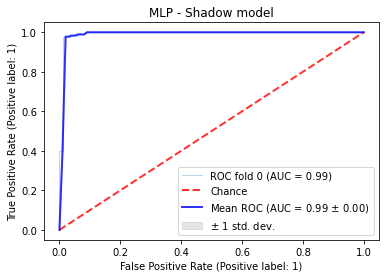

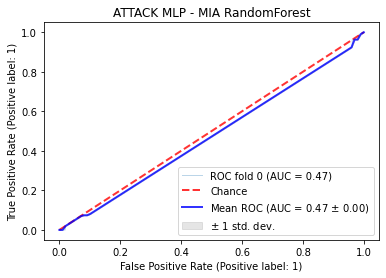

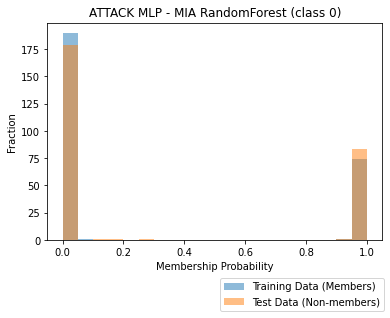

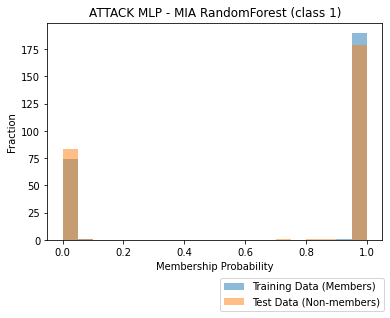

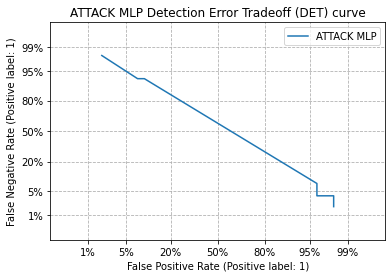

Attacker advantage 0.02026554856743537


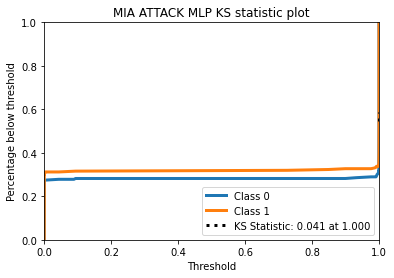

Target model KN


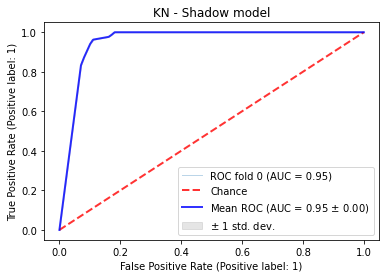

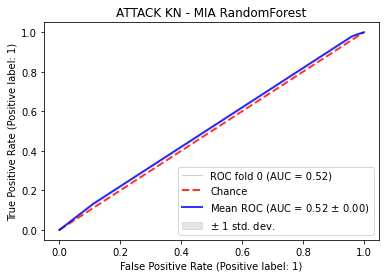

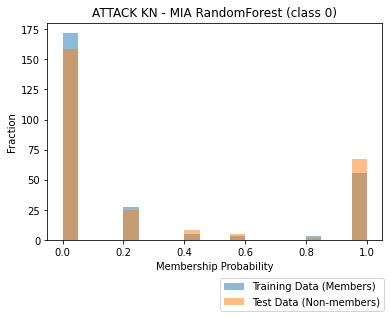

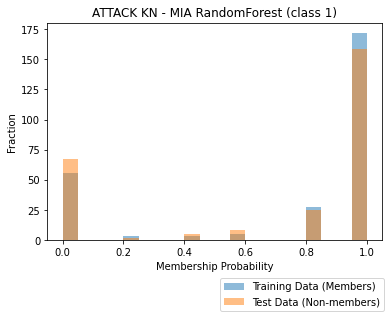

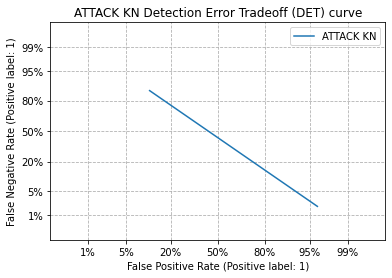

Attacker advantage 0.018169112508735208


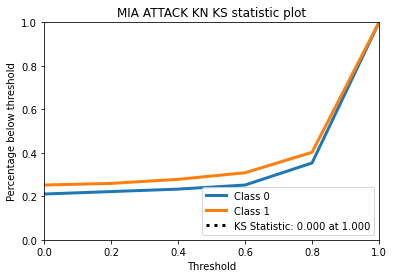

Target model SVM


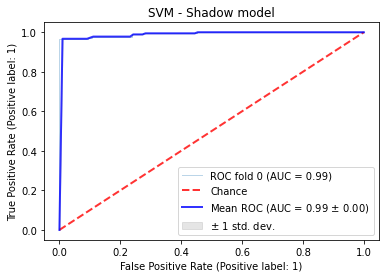

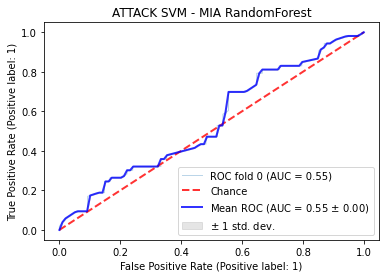

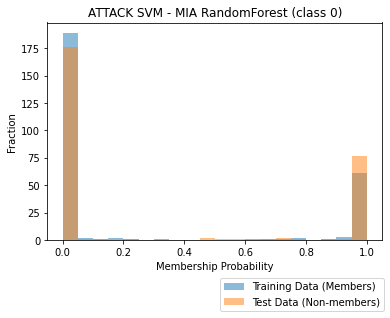

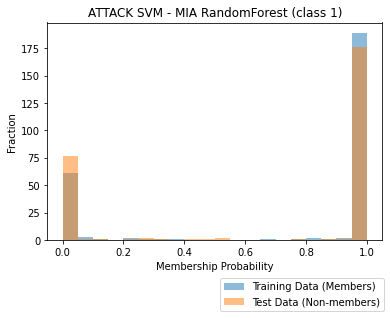

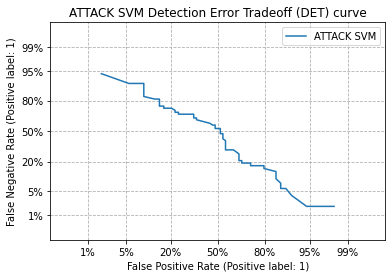

Attacker advantage 0.02935010482180289


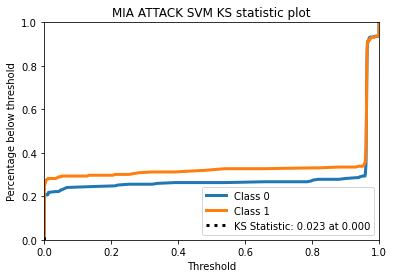

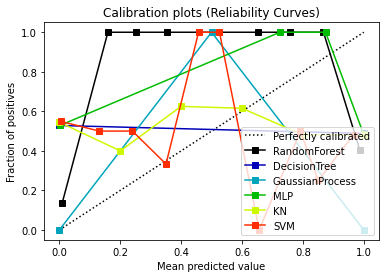

In [15]:
shadow_names = []
shadow_proba = []
for name, target_model in trained_models.items():
    print('Target model', name)
    
    #1 shadow model training
    shadow_model1 = classifiers[name]#same model and parameters as target model
    shadow_model1.fit(X_shadow_train, y_shadow_train)
    plotROC_classifier(shadow_model1, X_test, y_test, f'{name} - Shadow model')
    
    #2 attack model training
    # Get prediction probabilities from the shadow model    
    mia_name = 'RandomForest'
    proba, y_labels = run_membership_inference_attack("ATTACK "+name, shadow_model1, X_shadow_train, X_test, RandomForestClassifier(), 'RandomForest')
    shadow_names.append(name)
    shadow_proba.append(np.concatenate(proba))
plot_calibration_curve(y_labels, shadow_names, shadow_proba)

# Salem adversary 2 - Combining attack

The attacker does not have data coming from the same distribution as the target model’s training data.

The adversary does not know the structure of the target mode.

To improve the attack with no knowledge of the target model, a set of ML models are constructed (sub-shadow model), each with a different classification algorithm. The "combining attack" can learn the behavior of the different classifiers and therefore can attack an unknown target model based on the assumption that there is a sub-shadow model which is trained with the same classifier as the target model.

In [16]:
X_breast_cancer, y_breast_cancer = datasets.load_breast_cancer(return_X_y=True)
X_breast_cancer_train, X_breast_cancer_test, y_breast_cancer_train, y_breast_cancer_test = train_test_split(X_breast_cancer, y_breast_cancer,
                                                                                        shuffle=True,
                                                                                        test_size=0.3,
                                                                                        random_state=58954)

Sub-shadow model  RandomForest


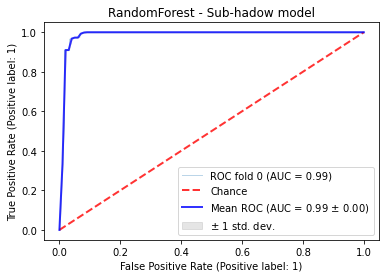

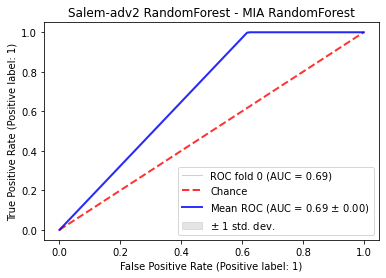

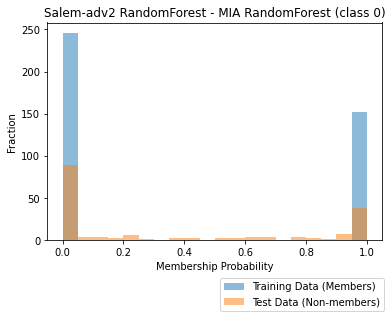

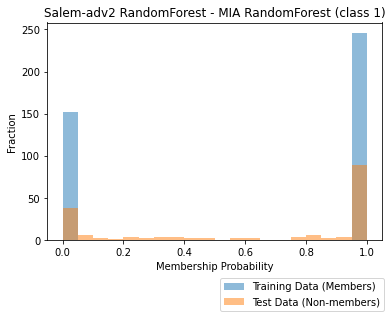

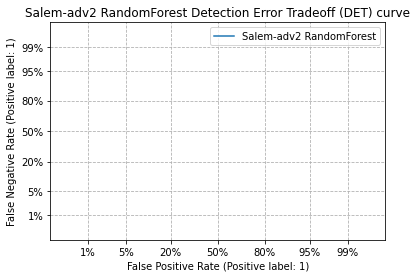

Attacker advantage 0.38235294117647056


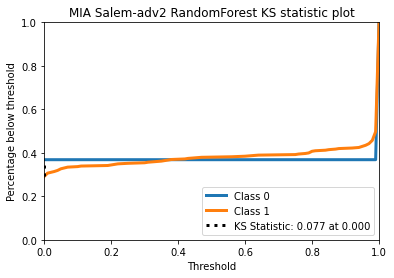

Sub-shadow model  DecisionTree


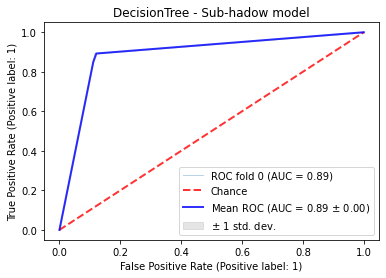

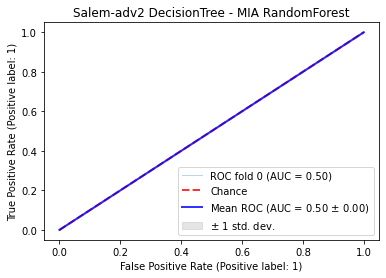

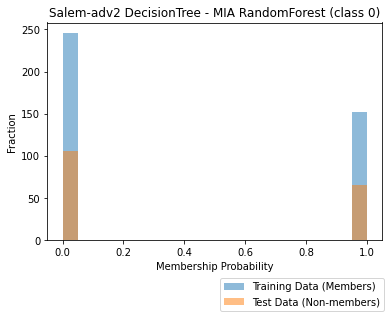

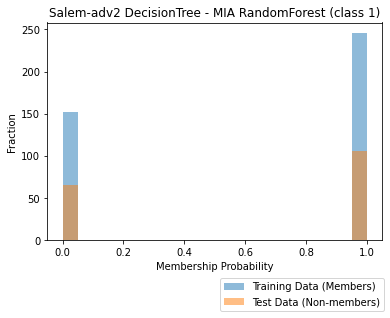

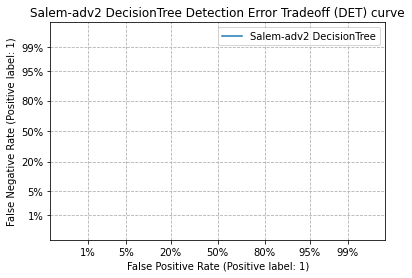

Attacker advantage 0.0


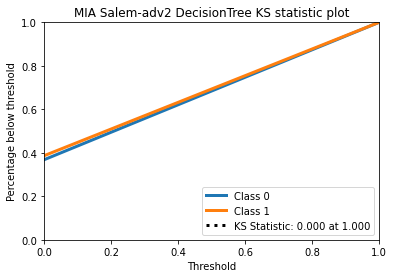

Sub-shadow model  GaussianProcess


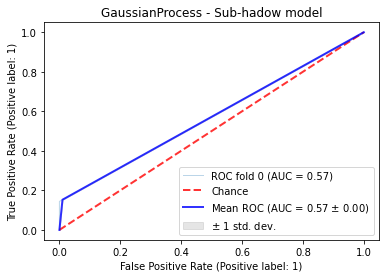

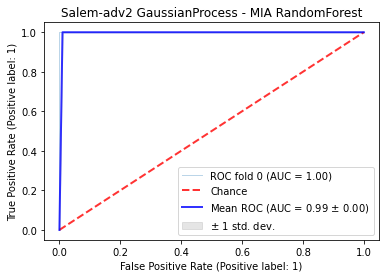

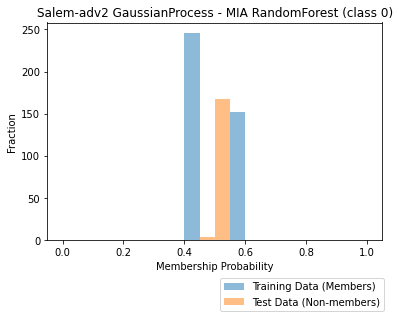

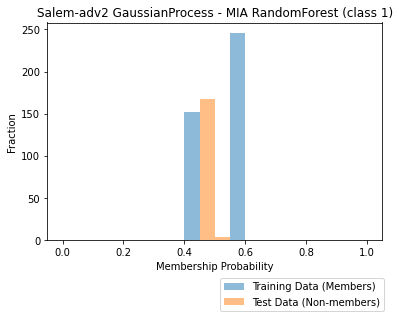

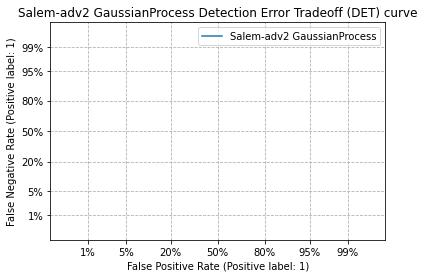

Attacker advantage 1.0


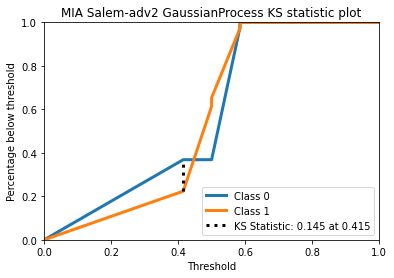

Sub-shadow model  MLP


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


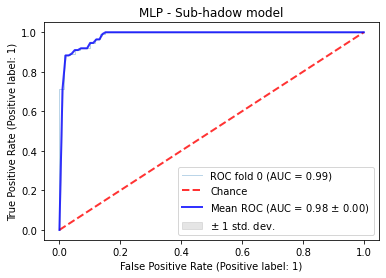

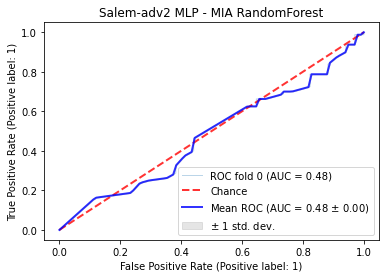

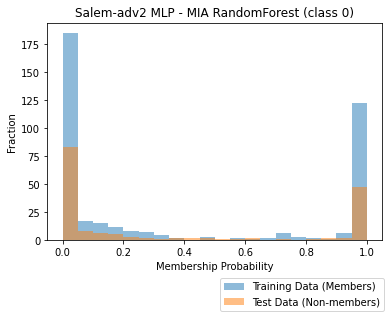

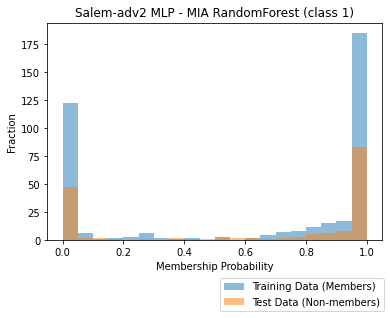

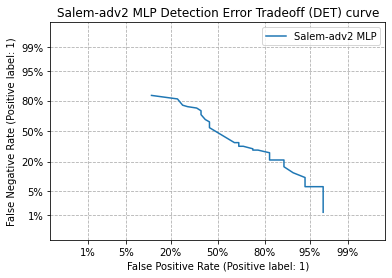

Attacker advantage 0.07352941176470584


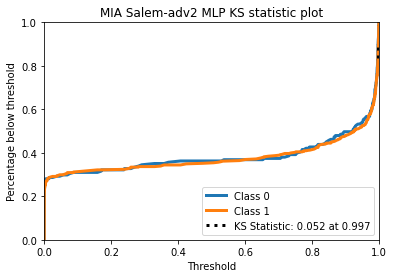

Sub-shadow model  KN


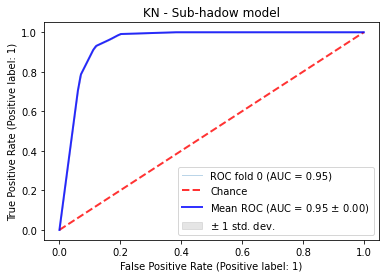

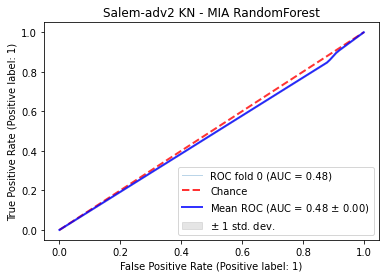

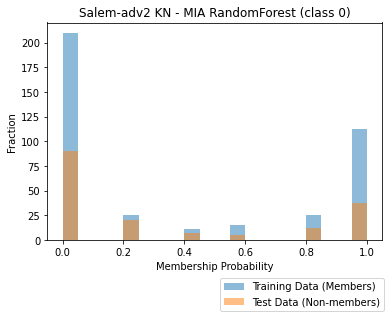

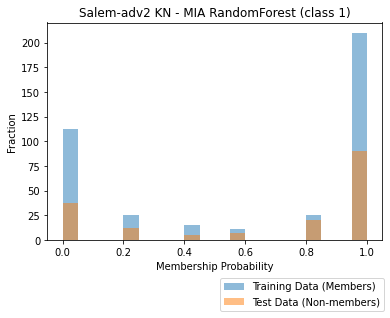

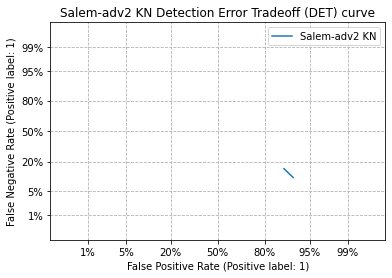

Attacker advantage 0.0


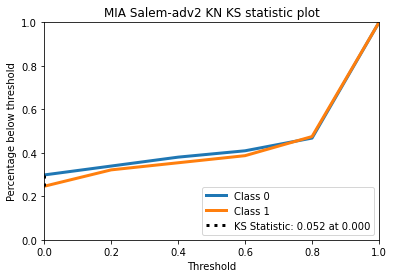

Sub-shadow model  SVM


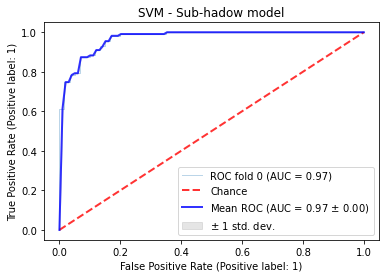

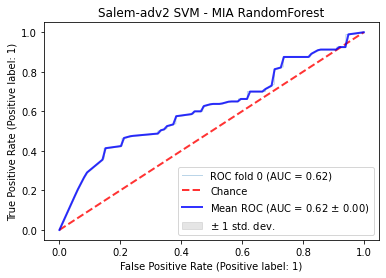

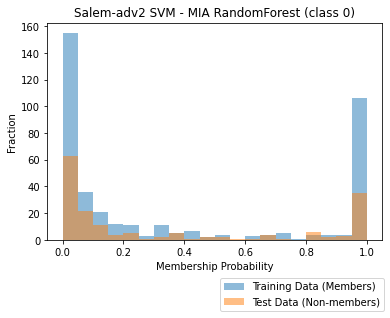

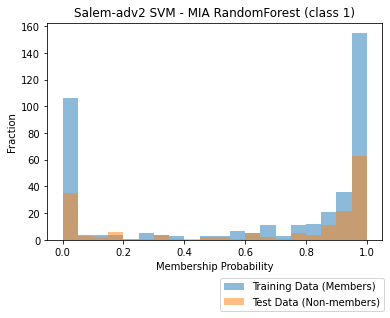

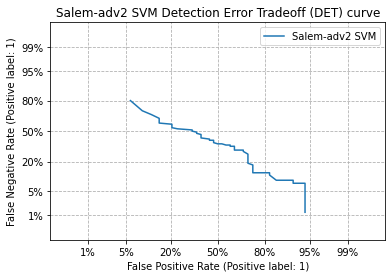

Attacker advantage 0.061764705882352944


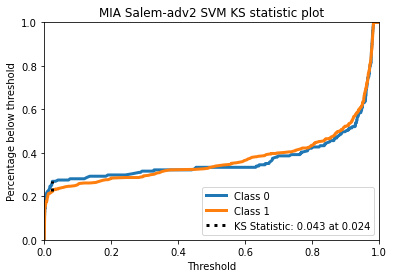

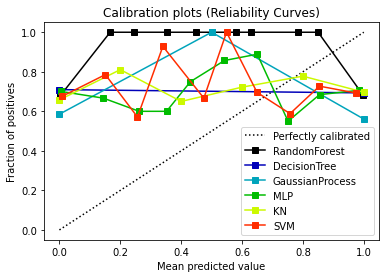

In [17]:
sub_shadow_names = []
sub_shadow_proba = []
for name,clf in classifiers.items():
    print('Sub-shadow model ',name)
    sub_shadow_model = clf
    sub_shadow_model.fit(X_breast_cancer_train, y_breast_cancer_train)
    plotROC_classifier(sub_shadow_model, X_breast_cancer_test, y_breast_cancer_test, f'{name} - Sub-hadow model')
    #2 attack model training
    # Get prediction probabilities from the shadow model    
    mia_name = 'RandomForest'
    proba, y_labels = run_membership_inference_attack("Salem-adv2 "+name, sub_shadow_model, X_breast_cancer_train, X_breast_cancer_test, RandomForestClassifier(), 'RandomForest')
    sub_shadow_names.append(name)
    sub_shadow_proba.append(np.concatenate(proba))
plot_calibration_curve(y_labels, sub_shadow_names, sub_shadow_proba)